# Projeto: teste de hipóteses e teste A/B

## Propósito e planejamento da análise
Projeto desenvolvido para uma grande loja online em parceria com o departamento de marketing. 

O objetivo foi aumentar a receita do e-commerce por meio da análise e priorização de hipóteses de otimização, seguida da avaliação de um teste A/B. A partir de uma lista de hipóteses elaboradas junto à equipe de marketing, conduzi uma análise comparativa utilizando os frameworks ICE e RICE para determinar prioridades estratégicas. Em seguida, examinei os dados do teste A/B para embasar decisões sobre a continuidade ou interrupção de intervenções.

**Objetivo:** Priorizar hipóteses, aplicar um teste A/B e analisar os resultados para gerar insights acionáveis que impactem a receita da loja.

## Parte 1: Pré-processamento e preparação dos dados

In [ ]:
# importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np


In [2]:
# leitura dos df
hypotheses_us = pd.read_csv('datasets/hypotheses_us.csv',sep=';')
orders_us = pd.read_csv('datasets/orders_us.csv')
visits_us = pd.read_csv('datasets/visits_us.csv')

### hypotheses_us
Df com nove hipóteses para aumentar a receita, com métricas de Reach, Impact, Confidence e Effort.

Colunas:
* `Hypotheses` — breves descrições das hipóteses
* `Reach` — alcance do usuário, em uma escala de um a dez
* `Impact` — impacto nos usuários, em uma escala de um a dez
* `Confidence` — confiança na hipótese, em uma escala de um a dez
* `Effort` — os recursos necessários para testar uma hipótese, em uma escala de um a dez. Quanto maior o valor de Effort, mais recursos são necessários para o teste.

In [3]:
# impressão das informações do df
hypotheses_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
# impressão do df 
hypotheses_us

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [5]:
# verifica se há linhas completamente duplicadas
hypotheses_us.duplicated().sum()

np.int64(0)

Observações sobre o df:
* O df não possui dados ausentes aparentes.
* O df não possui linhas completamente duplicadas.
* O título das colunas não está padronizado pela estratégia snake_case, pois estão com as iniciais maiúsculas, o que deve ser alterado.
* Os tipos de dados de cada coluna estão de acordo com os dados.
* Ao abrir o arquivo, observou-se que as 8 primeiras linhas apresentam, na descrição das hipóteses, 2 partes: a sugestão de ação e consequência esperada. A última hipótese, no entanto, apresenta apenas a ação, sem indicar o impacto esperado dessa ação, o que faz ela ser apenas uma ideia. Com isso, esta última linha do df será descartada.
* Para facilitar a análise dos dados, é interessante criar uma coluna `hypothesis_no` que identifique as hipóteses de forma numérica.

In [6]:
# remove a última linha do df
hypotheses_us = hypotheses_us.drop(hypotheses_us.index[-1])
hypotheses_us

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5


In [7]:
# padroniza o título das colunas
hypotheses_us.columns = hypotheses_us.columns.str.lower()


In [8]:
# criação da coluna 'hypothesis_no' para identificação das hipóteses por número
hypotheses_us.insert(0, 'hypothesis_no', 'hypothesis_' + hypotheses_us.index.astype(str))

hypotheses_us


,hypothesis_no,hypothesis,reach,impact,confidence,effort
0,hypothesis_0,Add two new channels for attracting traffic. T...,3,10,8,6
1,hypothesis_1,Launch your own delivery service. This will sh...,2,5,4,10
2,hypothesis_2,Add product recommendation blocks to the store...,8,3,7,3
3,hypothesis_3,Change the category structure. This will incre...,8,3,3,8
4,hypothesis_4,Change the background color on the main page. ...,3,1,1,1
5,hypothesis_5,Add a customer review page. This will increase...,3,2,2,3
6,hypothesis_6,Show banners with current offers and sales on ...,5,3,8,3
7,hypothesis_7,Add a subscription form to all the main pages....,10,7,8,5


In [9]:
# impressão das informações do df para verificar as alterações
hypotheses_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hypothesis_no  8 non-null      object
 1   hypothesis     8 non-null      object
 2   reach          8 non-null      int64 
 3   impact         8 non-null      int64 
 4   confidence     8 non-null      int64 
 5   effort         8 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 516.0+ bytes


### orders_us
Df com dados de compras realizadas pelos clientes da loja.

Colunas:
* `transactionId` — identificador do pedido
* `visitorId` — identificador do usuário que fez o pedido
* `date` — data do pedido
* `revenue` — valor do pedido
* `group` — o grupo de teste A/B ao qual o usuário pertence

In [10]:
# impressão das informações do df
orders_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [11]:
# impressão amostras do df
orders_us.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [12]:
# verifica se há linhas completamente duplicadas
orders_us.duplicated().sum()

np.int64(0)

Observações sobre o df:
* O df não possui dados ausentes aparentes.
* O df não possui linhas completamente duplicadas.
* O título das colunas não está padronizado pela estratégia snake_case, pois as duas primeiras colunas apresentam uma letra maiúscula em 'Id', o que deve ser alterado. Para facilitar a leitura, o final 'id' será separado do restante do nome por _
* Os dados da coluna `date` devem ser convertidos para o tipo datetime.

In [13]:
# alteração do título das colunas
orders_us.columns=['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders_us.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [14]:
# conversão dos dados da coluna 'date'
orders_us['date'] = pd.to_datetime(orders_us['date'])

In [15]:
# impressão das informações do df para verificar as alterações
orders_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


### visits_us
Df com resultados de um experimento A/B conduzido na plataforma da loja.

Colunas:
* `date` — data
* `group` — grupo de teste A/B
* `visits` — o número de visitas na data especificada para o grupo de teste A/B especificado

In [16]:
# impressão das informações do df
visits_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
# impressão amostras do df
visits_us.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
# verifica se há linhas completamente duplicadas
visits_us.duplicated().sum()

np.int64(0)

In [19]:
# verifica e conta os valores da coluna 'group'
visits_us['group'].value_counts()

group
A    31
B    31
Name: count, dtype: int64

Observações sobre o df:
* O df não possui dados ausentes aparentes.
* O df não possui linhas completamente duplicadas.
* O título das colunas está padronizado e não precisa de ajustes.
* Os dados da coluna `date` devem ser convertidos para o tipo datetime.

In [20]:
# conversão dos dados da coluna 'date'
visits_us['date'] = pd.to_datetime(visits_us['date'])

In [21]:
# impressão das informações do df para verificar as alterações
visits_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Parte 2: Priorização de Hipóteses

Aplicação dos frameworks ICE e RICE para avaliar e ranquear as hipóteses e comparar os resultados dos dois métodos.

In [22]:
hypotheses_us

,hypothesis_no,hypothesis,reach,impact,confidence,effort
0,hypothesis_0,Add two new channels for attracting traffic. T...,3,10,8,6
1,hypothesis_1,Launch your own delivery service. This will sh...,2,5,4,10
2,hypothesis_2,Add product recommendation blocks to the store...,8,3,7,3
3,hypothesis_3,Change the category structure. This will incre...,8,3,3,8
4,hypothesis_4,Change the background color on the main page. ...,3,1,1,1
5,hypothesis_5,Add a customer review page. This will increase...,3,2,2,3
6,hypothesis_6,Show banners with current offers and sales on ...,5,3,8,3
7,hypothesis_7,Add a subscription form to all the main pages....,10,7,8,5


In [23]:
# calcula ICE para as hipóteses e as classifica em ordem decrescente de prioridade
hypotheses_us['ICE'] = (hypotheses_us['impact'] * hypotheses_us['confidence']) / hypotheses_us['effort']

hypotheses_us[['hypothesis_no', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis_no,ICE
0,hypothesis_0,13.333333
7,hypothesis_7,11.200000
6,hypothesis_6,8.000000
2,hypothesis_2,7.000000
1,hypothesis_1,2.000000
5,hypothesis_5,1.333333
3,hypothesis_3,1.125000
4,hypothesis_4,1.000000


As hipóteses mais promissoras são as 0, 2, 6 e 7.

In [24]:
# calcula RICE para as hipóteses e as classifica em ordem decrescente de prioridade
hypotheses_us['RICE'] = (hypotheses_us['reach'] * hypotheses_us['impact'] * hypotheses_us['confidence']) / hypotheses_us['effort']

hypotheses_us[['hypothesis_no', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis_no,RICE
7,hypothesis_7,112.0
2,hypothesis_2,56.0
6,hypothesis_6,40.0
0,hypothesis_0,40.0
3,hypothesis_3,9.0
1,hypothesis_1,4.0
5,hypothesis_5,4.0
4,hypothesis_4,3.0


E, novamente, as hipóteses mais promissoras são 0, 2, 6 e 7. No entanto, desta vez, o número 7 ficou em primeiro lugar. Isso porque seu parâmetro Reach (Alcance) é 10, enquanto as demais hipóteses possuem valores menores para este parâmetro.

## Parte 3. Análise de teste A/B

Foi implementado um teste A/B para medir os efeitos da hipótese priorizada. Os usuários foram divididos aleatoriamente nos grupos A (controle) e B (teste).

Realização de uma análise detalhada dos resultados do teste A/B com base nas visitas e pedidos registrados:

* Criação de gráfico, com comentários sobre as tendências observadas:
    * Da receita acumulada por grupo de teste
    * Do tamanho médio acumulado dos pedidos
    * Da diferença relativa no tamanho médio do pedido entre os grupos ao longo do tempo.
* Cálculo e comparação das taxas diárias de conversão de cada grupo.
* Criação de gráfico da diferença relativa na conversão cumulativa para o grupo B em relação ao grupo A.
* Cálculo dos percentis 95 e 99 para:
    * o número de pedidos por usuário
    * os preços dos pedidos (e criação de gráfico de dispersão dos preços dos pedidos)
* Definição de limites para filtrar anomalias e analisar a influência das anomalias nos resultados.
* Condução de testes estatísticos (teste de Mann-Whitney) para avaliar a significância das diferenças entre os grupos, tanto em termos de conversão quanto de tamanho médio do pedido, com e sem as anomalias.

Com base nas análises realizadas, será apresentada a decisão se o experimento deveria ser encerrado ou continuado, considerando os seguintes cenários:
* Encerramento do teste com liderança clara de um grupo.
* Encerramento do teste sem diferença estatística entre os grupos.
* Continuação do teste para obter dados adicionais.

Para realizar a análise cumulativa dos dados do experimento A/B, o primeiro passo foi construir um vetor contendo todas as combinações únicas entre as datas (`date`) e os grupos de teste (`group`).

In [25]:
# constrói vetor com valores de pares unívocos de 'date' e 'group'
datesGroups = orders_us[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Com o vetor de combinações únicas entre data e grupo pronto, o próximo passo é criar os DataFrames `ordersAggregated` e `visitsAggregated`, contendo, respectivamente, os dados diários acumulados de pedidos e de visitas realizados durante o experimento. 

Para cada par `date-group`, os dados serão filtrados considerando todas as ocorrências até a data em questão e pertencentes ao grupo correspondente, e em seguida agregados para calcular o total acumulado de pedidos, visitantes únicos, receita e número de visitas. 

In [ ]:
# obtém dados diários cumulativos agregados sobre pedidos
ordersAggregated = datesGroups.apply(
    lambda x: orders_us[np.logical_and(orders_us['date'] <= x['date'], orders_us['group'] == x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'transaction_id' : pd.Series.nunique,
        'visitor_id' : pd.Series.nunique,
        'revenue' : 'sum'
        }), axis=1).sort_values(by=['date','group'])

ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [27]:
# obtém dados diários cumulativos agregados sobre visitas  
visitsAggregated = datesGroups.apply(
    lambda x: visits_us[np.logical_and(visits_us['date'] <= x['date'], visits_us['group'] == x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'visits' : 'sum'
        }), axis=1).sort_values(by=['date','group'])

visitsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Agora as duas tabelas serão combinadas em um único df chamado `cumulativeData`, a partir do método `.merge()` com base nas colunas `date` e `group`.

In [28]:
# junta as duas tabelas em uma e dá nomes descritivos para suas colunas
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
cumulativeData.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


Para visualizar a receita acumulada por grupo, será criado um gráfico de linhas que mostra a evolução da receita ao longo do tempo para cada grupo do experimento A/B. Esse gráfico permitirá comparar visualmente o desempenho financeiro dos grupos A e B, identificando diferenças na trajetória da receita acumulada e possibilitando a análise do impacto da intervenção testada.

In [29]:
# df com pedidos cumulativos e receita cumulativa por dia (grupo A)
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# df com pedidos cumulativos e receita cumulativa por dia (grupo B)
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

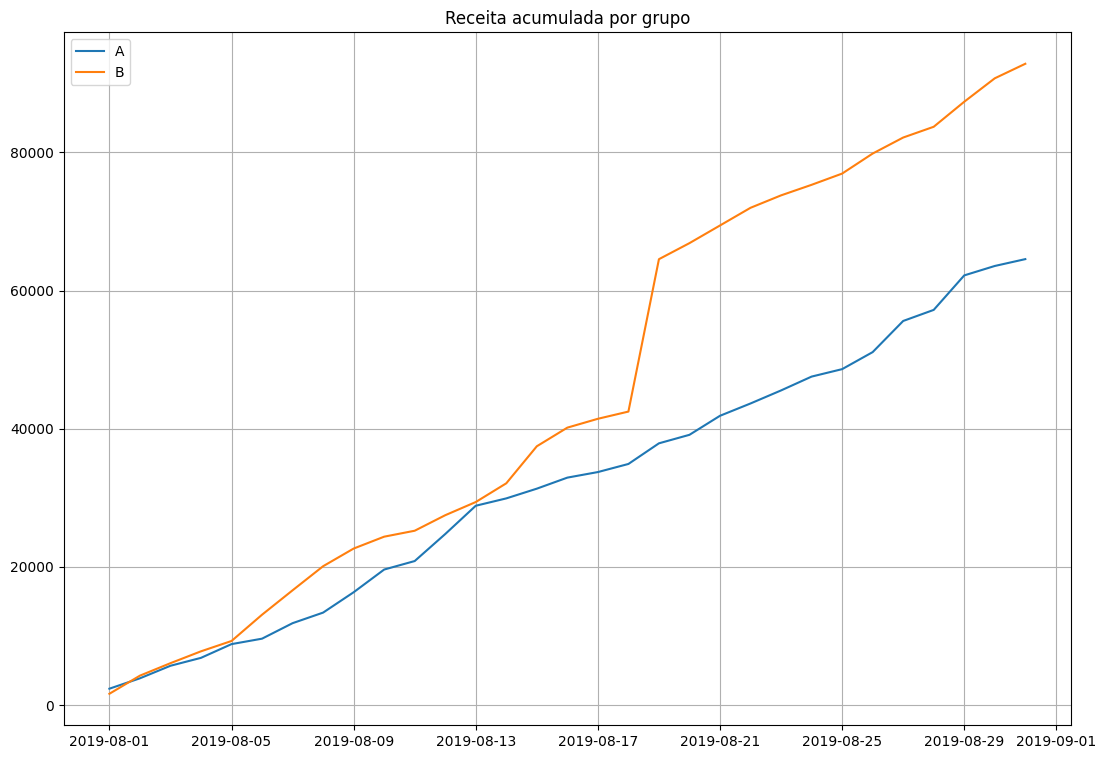

In [42]:
# constrói o gráfico de receita do grupo A 
plt.figure(figsize=(13, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# construindo o gráfico de receita do grupo B 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Receita acumulada por grupo')
plt.grid()
plt.show()
plt.close()

Observações: 
* Ambos os grupos apresentam um crescimento contínuo na receita acumulada ao longo do período, o que indica que as vendas são constantes.
* O grupo B acumula uma reveita maior que o grupo A em praticamente todo o período, o que pode indicar que a intervenção aplicada no grupo B teve um impacto positivo na geração de receita, tendo um salto considerável após a data 2019-08-18. Esse aumento é, depois, mantido pelo grupo B, o que pode indicar que o efeito da intervenção feito neste grupo é duradouro e consistente.

O salto observado pode indicar o início de uma ação de marketing, uma melhoria na experiência do usuário ou outra variável que impactou positivamente as vendas do grupo B. A diferença consistente sugere que a mudança testada vale a pena ser implementada definitivamente, investigando, também, se houve impacto em outros indicadores, como taxa de conversão ou tamanho médio do pedido.

Agora, será construído o gráfico do volume médio de compra por grupo. Para isso, a receita cumulativa serpa dividida pela quantidade cumulativa de pedidos.

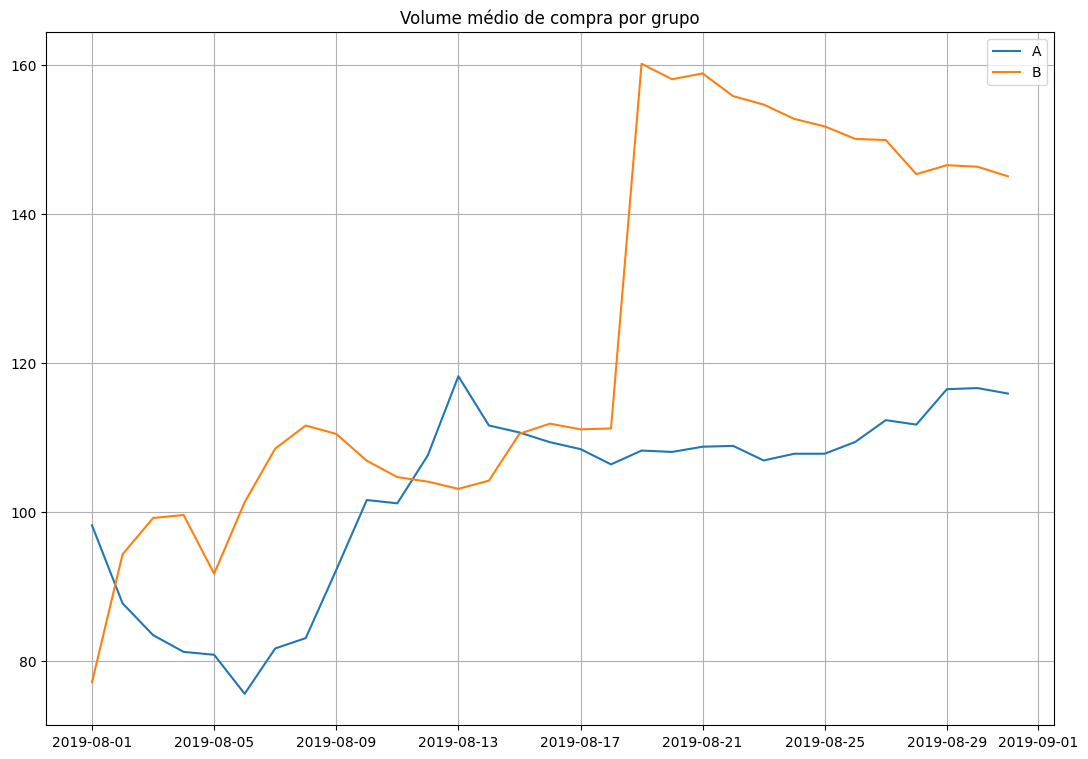

In [44]:
plt.figure(figsize=(13, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('Volume médio de compra por grupo')
plt.grid()
plt.show()
plt.close()

Observações:
* Ambos os grupos mostram flutuações no volume médio de compra ao longo do período, mas o grupo A mantém um comportamento mais estável e menos volátil, com uma leve tendência de alta ao longo do mês.
* Até o dia 18 de agosto, os grupos A e B estão relativamente próximos, com pequenas diferenças e trocando liderança. Após essa data, há um pico brusco no grupo B, tornando seu volume médio de compra muito superior ao grupo A. Após o dia 21, o grupo B apresenta uma queda gradual neste volume (indicando que o impacto pode ser a curto prazo), mas ainda permanece com valores mais altos que o grupo A.


Para analisar melhor o impacto da variação testada, será construído um gráfico de diferença relativa para os volumes médios de compras do grupo B em comparação ao grupo A, acrescentando um horizontal com o método `axhline()`. Essa diferença relativa mostra quanto melhor (ou pior) o Grupo B performou em relação ao Grupo A (baseline) em termos de valor médio por pedido.

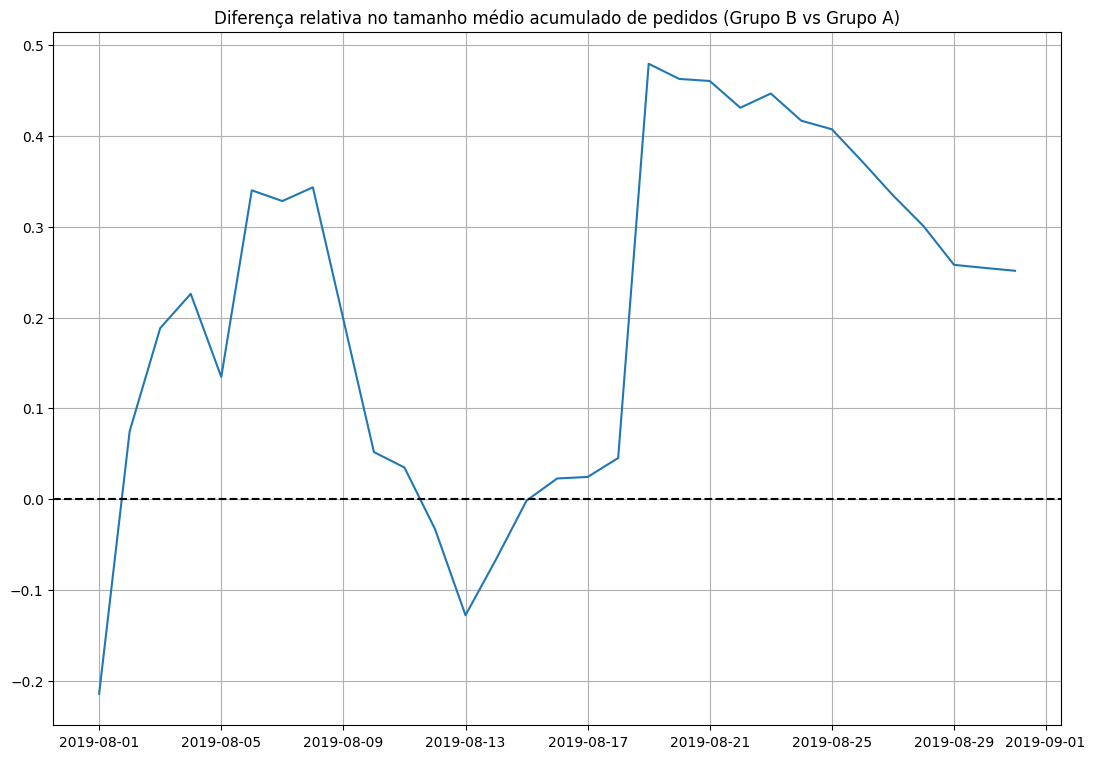

In [48]:
# reunindo os dados em um DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# construindo um gráfico de diferença relativa para os volumes médios de compra
plt.figure(figsize=(13, 9))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# acrescentando o eixo X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferença relativa no tamanho médio acumulado de pedidos (Grupo B vs Grupo A)')
plt.grid()
plt.show()
plt.close()

Observações:
* O gráfico mostra que a diferença relativa no volume médio entre os grupos não é constante, apresentando picos (aumentos abruptos) em determinados momentos. 
* Observa-se que a linha mantém-se próxima a zero até o dia 05, indicando que os grupos apresentavam desempenhos similares. O grupo B consegue ultrapassar o grupo A em um breve período entre os dias 6 e 8, mas logo depois a diferença cai rapidamente até o dia 13.
* Após o dia 13, o valor volta a subir e por volta do dia 18, observa-se um aumento acentuado na diferença relativa, indicando que o grupo B teve um pico positivo no seu volume médio, que ficou significativamente maior que o Grupo A. 
* Após esse salto, a diferença começa a diminuir gradualmente, mas permanece positiva até o fim do mês, indicando que o grupo B manteve pedidos médios maiores do que o grupo A, mesmo após o efeito inicial começar a se dissipar.

É preciso verificar se essa diferença do volume médio entre os grupos veio de mais compradores (aumento de conversão) ou apenas de compras maiores (aumento de valor sem crescimento na base).

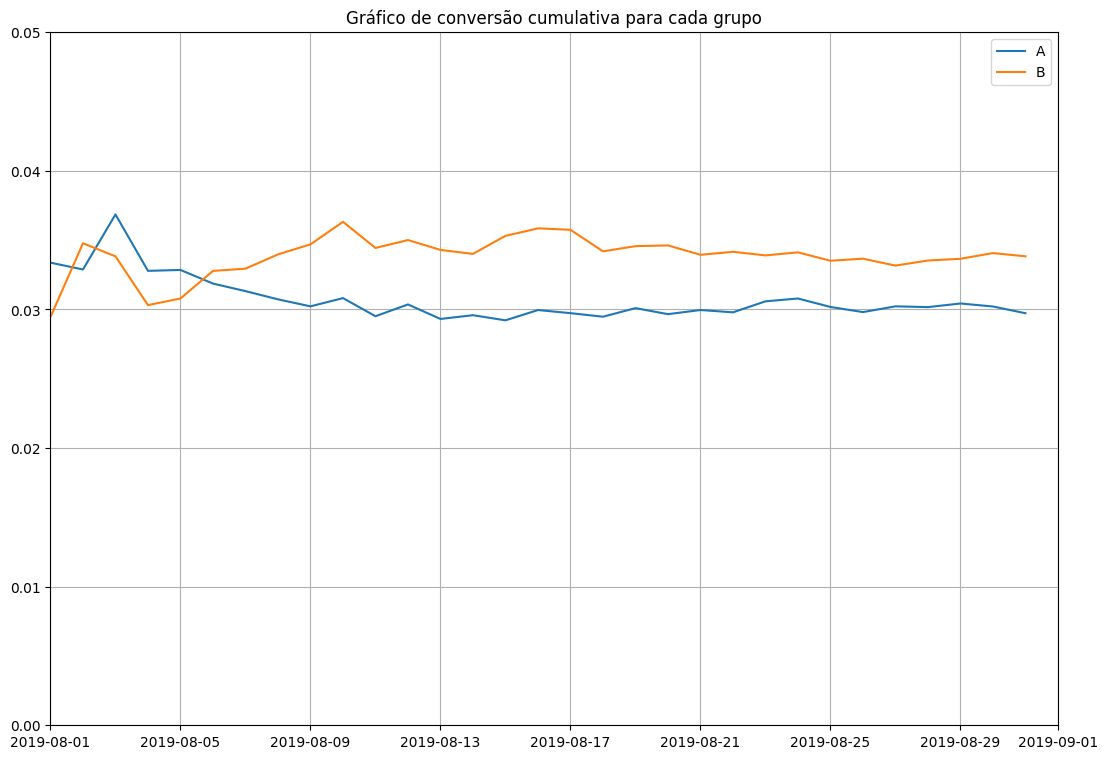

In [ ]:
# calculando a conversão cumulativa
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecionando dados no grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Selecionando dados no grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# construindo os gráficos
plt.figure(figsize=(13, 9))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Conversão cumulativa para cada grupo')
plt.legend()

# definindo a escala dos eixos
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-09-01'), 0, 0.05])
plt.grid()
plt.show()
plt.close()

Observações:
* Ambos os grupos começam com taxas de conversão próximas, indicando comportamento similar no início do teste, mas após o dia 9, o grupo B mostra um aumento mais acentuado na conversão cumulativa em comparação com o grupo A. 
* A diferença entre os grupos se torna mais pronunciada a partir de meados de agosto (por volta do dia 13/08).
* Ambos os grupos apresentam um crescimento estável na conversão cumulativa, sem quedas bruscas, mas com a conversão do grupo B mantendo-se acima do grupo A.

Para avaliar visualmente o desempenho relativo dos dois grupos no experimento A/B, será criado um gráfico que mostra, dia após dia, a diferença relativa entre as taxas de conversão cumulativas dos grupos B e A ao longo do tempo.

A ideia é observar se o grupo B está consistentemente apresentando maior taxa de conversão que o grupo A, ou se os resultados oscilam ou convergem ao longo do tempo.

Para isso, será criado o DataFrame `mergedCumulativeConversions`, contendo os dados de conversão acumulada por data para ambos os grupos. A junção será feita com base na coluna `date`, permitindo comparar as conversões dos dois grupos em cada ponto da linha do tempo.

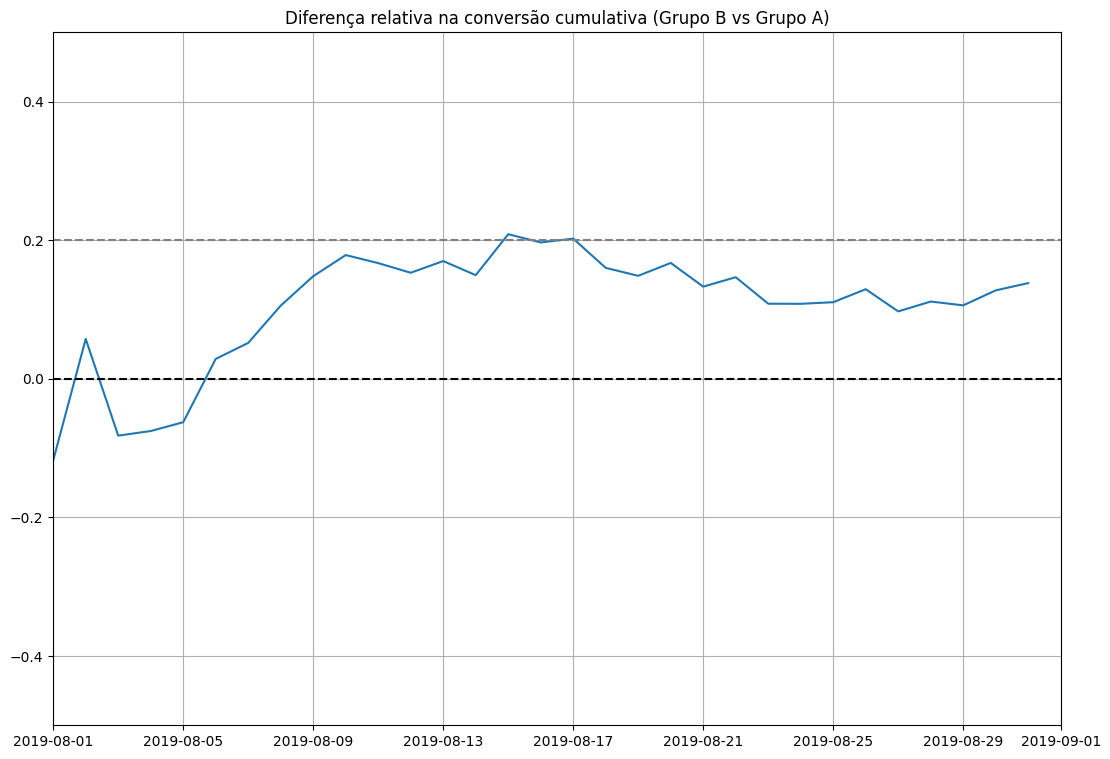

In [51]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13, 9))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Diferença relativa na conversão cumulativa (Grupo B vs Grupo A)')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.5, 0.5])

plt.grid()
plt.show()
plt.close()


Observações:
* O gráfico inicia com valores negativos ou muito próximos de zero, indicando que o grupo B estava com desempenho igual ou ligeiramente inferior ao grupo A.
* Após o dia 5, o gráfico apresenta um crescimento constante, indicando uma melhora na conversão cumulativa pelo grupo B.
* O grupo B mantém desempenho superior ao A em conversão cumulativa durante praticamente todo o mês, com um pico por volta do dia 15. 
* Após o pico, a diferença se mantém estável entre 0.1 e 0.2. 

A intervenção aplicada ao grupo B parece ter aumentado a taxa de conversão de forma clara e sustentada ao longo do tempo.

Para verificar se há anomalias nos dados, serão calculados os percentis 95 e 99 para o número de pedidos por usuário. Isso permite identificar se há outliners que podem distorcer as médias.


In [52]:
orders_us.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [ ]:
# cria um DataFrame com o total de pedidos por visitante
ordersByUsers = (
    orders_us.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


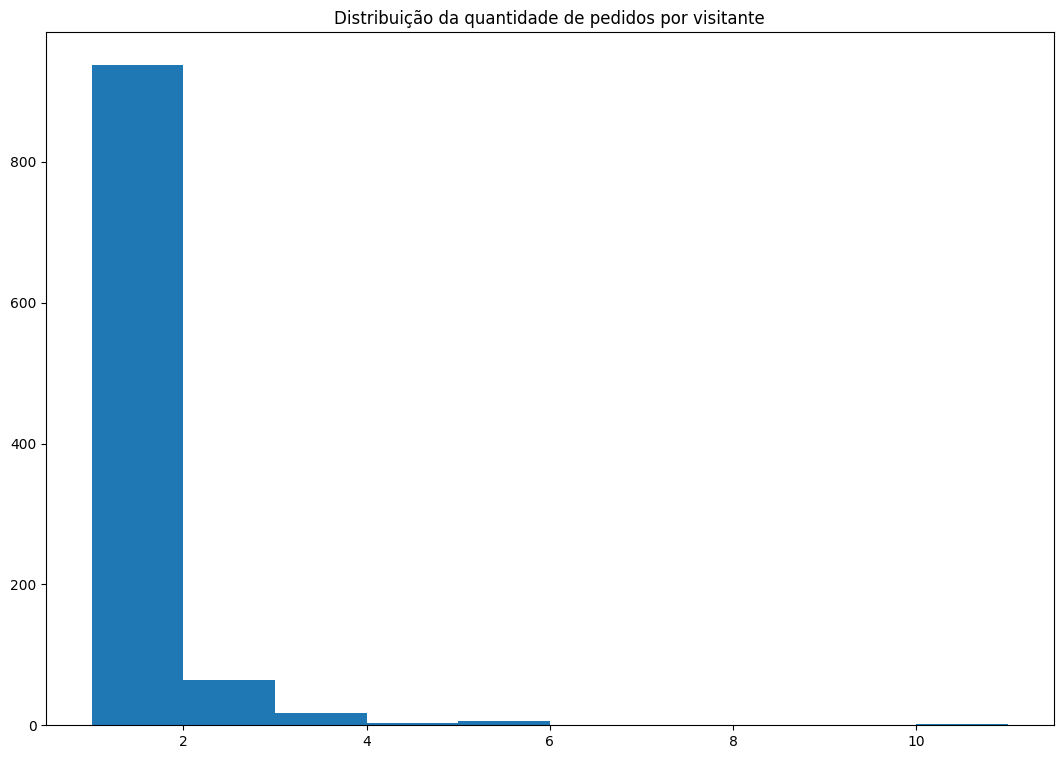

In [53]:
# cria um histograma do número de pedidos por visitante
plt.figure(figsize=(13, 9))

plt.hist(ordersByUsers['orders'])

plt.title("Distribuição da quantidade de pedidos por visitante")

plt.show()
plt.close()

A maioria dos clientes realizou apenas um pedido. Porém, uma parcela significante efetuou de dois a quatro pedidos cada.

In [ ]:
# calcula percentis para a quantidade de pedidos por usuário
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Menos de 5% dos usuários fez mais do que 2 pedidos e menos de 1% fez mais que 4 pedidos.
Portanto, é razoável definir um limite de quatro pedidos por usuário como o limite superior para o comportamento normal e usar isso para filtrar qualquer anomalia. 

Também serão calculados os percentis 95 e 99 para o valor dos pedidos. Isso permite identificar pedidos extremamente caros, que também podem ser anomalias.

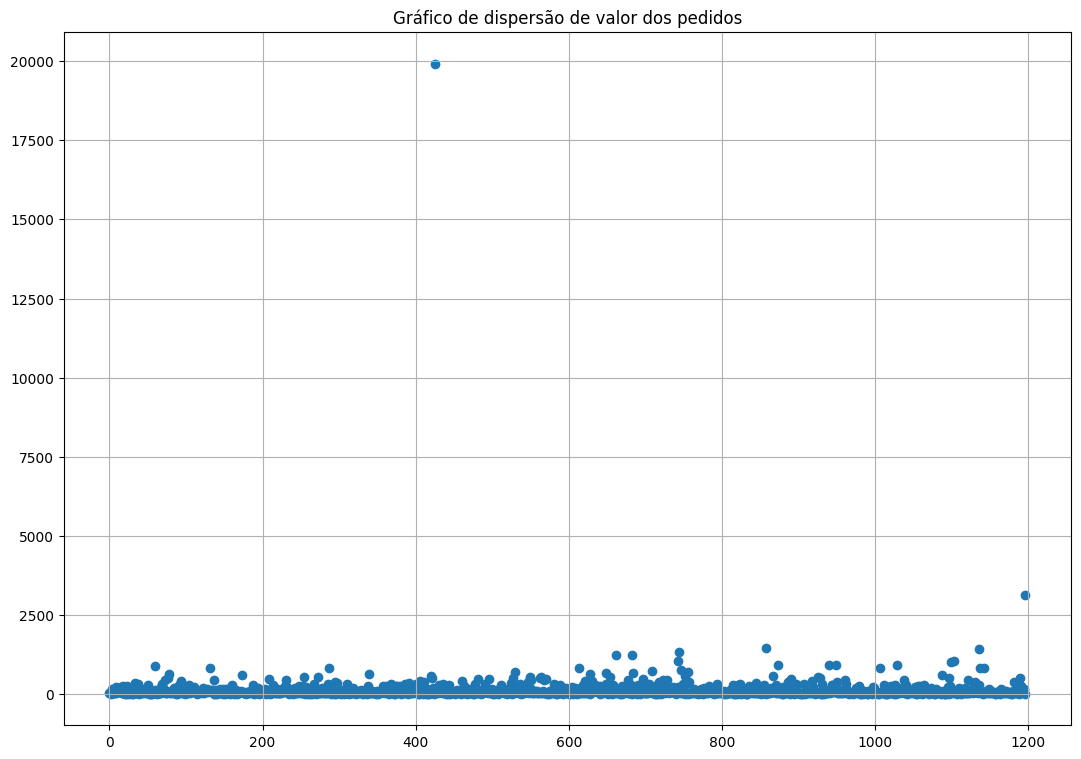

In [55]:
# cria um gráfico de dispersão do valor dos pedidos
plt.figure(figsize=(13, 9))
x_values = pd.Series(range(0,len(orders_us['revenue'])))

plt.scatter(x_values, orders_us['revenue'])

plt.title("Gráfico de dispersão de valor dos pedidos")

plt.grid()
plt.show()
plt.close()

A maioria dos pedidos está concentrada abaixo de 1.000, com uma grande densidade entre os valores 0 e 500.

In [54]:
# calcula percentis para o valor por pedido
np.percentile(orders_us['revenue'], [95, 99])

array([435.54 , 900.904])

Menos de 5% dos pedidos ultrapassa o valor de 435.54, e menos de 1% dos pedidos tem o preço maior que 900.904.
Vamos considerar como preços anômalos aqueles que forem superiores a 500.

In [41]:
orders_us

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


Agora, será verificado se as diferenças observadas nas taxas de conversão entre os grupos A e B é estatisticamente significativa, tanto usando os dados brutos (sem remover outliers), quanto com os dados filtrados (após remover outliers de valor ou de número de pedidos por usuário).

Primeiramente serão criadas as variáveis ordersByUsersA e ordersByUsersB com as colunas ['userId', 'orders'], nas quais a quantidade de pedidos por usuários com pelo menos um pedido será especificada.

In [61]:
ordersByUsersA = orders_us[orders_us['group']=='A'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders_us[orders_us['group']=='B'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

Agora, serão declaradas as variáveis `sampleA` e `sampleB`, com a quatnidade de usuários que realizaram pedidos e a quantidade de pedidos correspondente. Usuários sem pedidos terão 0. 

In [66]:
# cria as amostras
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits_us[visits_us['group']=='A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits_us[visits_us['group']=='B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0
)


Por fim, será aplicado o teste Mann-Whitney para calcular a significância estatística da diferença de conversão entre os grupos usando os dados brutos.

In [82]:
print('valor-p da diferença de conversão entre os grupos (dados brutos):',
       '{0:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Diferença relativa de conversão entre os grupos (dados brutos): ', 
      '{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

valor-p da diferença de conversão entre os grupos (dados brutos): 0.01679
Diferença relativa de conversão entre os grupos (dados brutos):  0.138


O teste Mann-Whitney também será aplicado para calcular a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos.

In [76]:
print('valor-p da diferença do tamanho médio do pedido entre os grupos (dados brutos): ', '{0:.3f}'.format(
    st.mannwhitneyu(
        orders_us[orders_us['group']=='A']['revenue'],
          orders_us[orders_us['group']=='B']['revenue']
          )[1]))

print('Diferença relativa do tamanho médio do pedido entre os grupos (dados brutos): ',
       '{0:.3f}'.format(
           orders_us[orders_us['group']=='B']['revenue'].mean()/orders_us[orders_us['group']=='A']['revenue'].mean()-1))

valor-p da diferença do tamanho médio do pedido entre os grupos (dados brutos):  0.692
Diferença relativa do tamanho médio do pedido entre os grupos (dados brutos):  0.252


Agora vamos remover as anomalias de nossos dados para verificar se os resultados de conversão se mantêm estáveis sem os outliers; e se o tamanho médio do pedido se torna mais estável e/ou significativo.

Anomalias:
* Usuários com mais de quatro pedidos
* Pedidos com valor superior a 500.

In [78]:
# fatia os dados para usuários com quatro ou mais pedidos
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] >= 4]['visitor_id'],
    ordersByUsersB[ordersByUsersB['orders'] >= 4]['visitor_id']
    ],
    axis = 0
)

# fatia os dados para usuários com pedidos com valores superiores a 500
usersWithExpensiveOrders = orders_us[orders_us['revenue'] > 500]['visitor_id']

# junta as fatias em uma tabela de usuários anômalos
abnormalUsers = pd.concat(
    [usersWithManyOrders,
    usersWithExpensiveOrders],
    axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64


Agora serão removidos os visitantes anômalos para calcular a significância estatística da diferença de conversão. Serão criadas as variáveis `sampleAFiltered` e `sampleBFiltered` para armazenar os dados após as anomalias terem sido removidas pela filtragem.

In [ ]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[
        np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]
        ['orders'],pd.Series(
            0,
            index=np.arange(
                visits_us[visits_us['group']=='A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders'
        )
    ],
    axis=0
)

sampleBFiltered = pd.concat(
    [ordersByUsersB[
        np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]
        ['orders'],pd.Series(
            0,
            index=np.arange(
                visits_us[visits_us['group']=='B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders'
        )
    ],
    axis=0
)


In [86]:
print('valor-p da diferença de conversão entre os grupos (dados filtrados):',
       '{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Diferença relativa de conversão entre os grupos (dados filtrados): ',
       '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

print()

print('valor-p da diferença do tamanho médio do pedido entre os grupos (dados filtrados): ', '{0:.3f}'.format(
    st.mannwhitneyu(
        orders_us[orders_us['group']=='A']['revenue'],
          orders_us[orders_us['group']=='B']['revenue']
          )[1]))

print('Diferença relativa do tamanho médio do pedido entre os grupos (dados filtrados): ',
       '{0:.3f}'.format(orders_us[np.logical_and(
           orders_us['group']=='B',
           np.logical_not(orders_us['visitor_id'].isin(abnormalUsers)))
           ]['revenue'].mean() /
           orders_us[np.logical_and(
               orders_us['group']=='A',
               np.logical_not(orders_us['visitor_id'].isin(abnormalUsers)))
               ]['revenue'].mean() - 1))

valor-p da diferença de conversão entre os grupos (dados filtrados): 0.01465
Diferença relativa de conversão entre os grupos (dados filtrados):  0.154

valor-p da diferença do tamanho médio do pedido entre os grupos (dados filtrados):  0.692
Diferença relativa do tamanho médio do pedido entre os grupos (dados filtrados):  0.013


Ao analisarmos os dados brutos, concluimos que:
* O valor-p é 0.01679, ou seja, é menor que 0.05, então rejeitamos a hipótese nula de que não há diferença nas taxas de conversão.
* A diferença relativa de conversão é de 0.138, o que indica que o grupo B teve 13,8% mais conversões que o grupo A ao longo do período do teste.
* O valor-p é 0.692 consideravelmente maior que 0.05, então não há motivo para rejeitar a hipótese nula e concluir que o tamanho médio do pedido seria diferente entre os grupos.
* A diferença relativa é de 0.252, o que indica que o grupo B teve, em média, pedidos 25,2% maiores que o grupo A. 



Ao analisarmos os dados filtrados, concluimos que:
* O valor-p da diferença de conversão entre os grupos continua sendo menor que 0.05, então rejeitamos a hipótese nula de que não há diferença nas taxas de conversão.
* A diferença relativa de conversão é de 0.154, o que indica que o grupo B teve 15,4% mais conversões que o grupo A ao longo do período do teste.

* O valor-p da diferença no tamanho médio do pedido continuou acima de 0.05 (0.692), o que reforça que não há diferença estatisticamente significativa entre os grupos para essa métrica.
* A diferença relativa no tamanho médio foi de apenas +1,3%, o que representa uma variação pequena e, nesse contexto, irrelevante do ponto de vista estatístico e prático.

### Conclusões do teste A/B

O experimento A/B demonstra que a variante testada no grupo B aumentou significativamente a taxa de conversão, tanto com os dados brutos quanto com os dados filtrados.

Embora o grupo B também tenha apresentado valores mais altos no tamanho médio dos pedidos, essa diferença não é estatisticamente significativa.

Com base nas análises realizadas tanto com os dados brutos quanto com os dados filtrados, a decisão mais apropriada é: 1. Pare o teste e considere o grupo B como líder.

**Justificativa:**
O grupo B teve uma melhora estatisticamente significativa na taxa de conversão:
* +13,8% com dados brutos (valor-p = 0.01679)
* +15,4% com dados filtrados (valor-p = 0.01465)
A diferença permanece significativa mesmo após remover outliers, o que indica robustez dos resultados.

Além disso, o tamanho médio do pedido (AOV) apresenta uma diferença que não é estatisticamente significativa em nenhum cenário:
* Diferença de +25,2% com dados brutos (valor-p = 0.692)
* Diferença de +1,3% com dados filtrados (valor-p = 0.692)
Portanto, não há impacto negativo conhecido no valor médio dos pedidos.

Ou seja: 
* a variante testada no grupo B aumenta a conversão de forma consistente e estatisticamente comprovada;
* não há efeitos colaterais evidentes em outras métricas analisadas;
* continuar o teste teria custo adicional, mas benefício limitado, pois o padrão já se consolidou.

Então, o melhor curso de ação é encerrar o experimento e adotar a variante do grupo B como a nova versão padrão.